In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

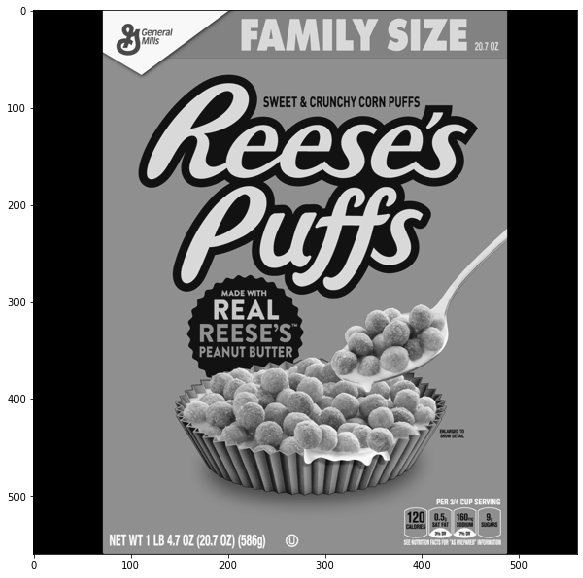

In [4]:
reeses = cv2.imread("../../DATA/reeses_puffs.png",0)
display(reeses)

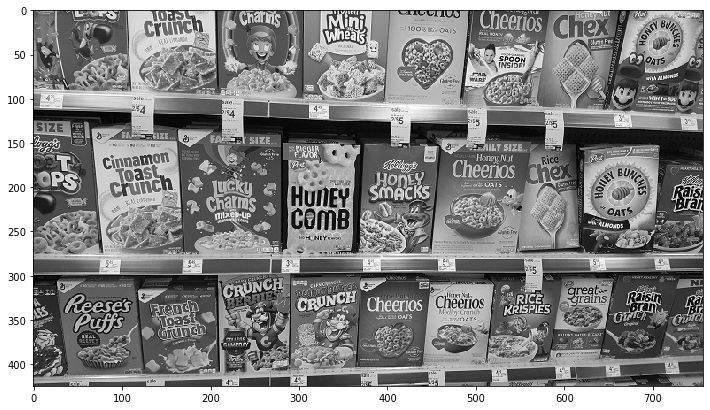

In [5]:
cereals = cv2.imread("../../DATA/many_cereals.jpg",0)
display(cereals)

In [6]:
orb = cv2.ORB_create()

In [9]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [10]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)

In [11]:
matches

[<DMatch 00000170F12F0F10>,
 <DMatch 00000170F12F0B10>,
 <DMatch 00000170F12F0D50>,
 <DMatch 00000170F12F0D10>,
 <DMatch 00000170F13A7650>,
 <DMatch 00000170F13A7030>,
 <DMatch 00000170F13A7A90>,
 <DMatch 00000170F13A7A10>,
 <DMatch 00000170F13A77B0>,
 <DMatch 00000170F13A72D0>,
 <DMatch 00000170F13A7A50>,
 <DMatch 00000170F13A7AD0>,
 <DMatch 00000170F13A7A30>,
 <DMatch 00000170F13A7C90>,
 <DMatch 00000170F13A7E90>,
 <DMatch 00000170F13A79B0>,
 <DMatch 00000170F13A7970>,
 <DMatch 00000170F13A7BF0>,
 <DMatch 00000170F13A7E70>,
 <DMatch 00000170F13A7F50>,
 <DMatch 00000170F13A7C50>,
 <DMatch 00000170F13A7390>,
 <DMatch 00000170F13A7C70>,
 <DMatch 00000170F13A7DF0>,
 <DMatch 00000170F13A7D10>,
 <DMatch 00000170F13A7F70>,
 <DMatch 00000170F13A7FB0>,
 <DMatch 00000170F13A7230>,
 <DMatch 00000170F13A73D0>,
 <DMatch 00000170F13A7AB0>,
 <DMatch 00000170F13A7BB0>,
 <DMatch 00000170F13A78D0>,
 <DMatch 00000170F13A7610>,
 <DMatch 00000170F13A7930>,
 <DMatch 00000170F13A7B90>,
 <DMatch 00000170F13

In [12]:
matches = sorted(matches,key=lambda x:x.distance)

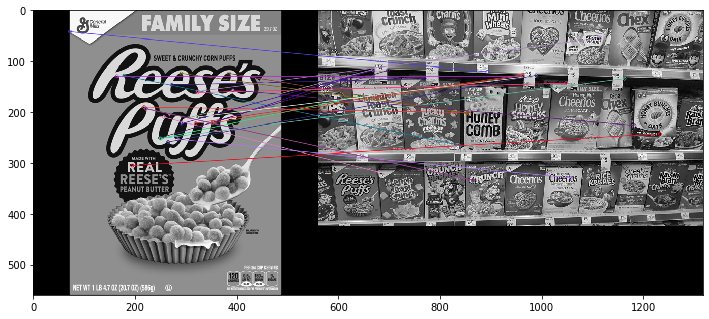

In [15]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_matches)

In [19]:
# SIFT Description
sift = cv2.SIFT_create()

In [20]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [22]:
bf = cv2.BFMatcher()

In [27]:
matches = bf.knnMatch(des1,des2,k=2)

In [28]:
matches

[[<DMatch 00000170F15F3E10>, <DMatch 00000170F15F3DD0>],
 [<DMatch 00000170F15F3F10>, <DMatch 00000170F15F3EB0>],
 [<DMatch 00000170F15F3D70>, <DMatch 00000170F15F3ED0>],
 [<DMatch 00000170F15F3E30>, <DMatch 00000170F15F3E50>],
 [<DMatch 00000170F15F3E90>, <DMatch 00000170F15F3F70>],
 [<DMatch 00000170F15F3F30>, <DMatch 00000170F15F3D90>],
 [<DMatch 00000170F15F3EF0>, <DMatch 00000170F15F3F90>],
 [<DMatch 00000170F15F3FB0>, <DMatch 00000170F15F3FD0>],
 [<DMatch 00000170F15FC030>, <DMatch 00000170F15FC050>],
 [<DMatch 00000170F15FC070>, <DMatch 00000170F15FC090>],
 [<DMatch 00000170F15FC0B0>, <DMatch 00000170F15FC0D0>],
 [<DMatch 00000170F15FC0F0>, <DMatch 00000170F15FC110>],
 [<DMatch 00000170F15FC130>, <DMatch 00000170F15FC150>],
 [<DMatch 00000170F15FC170>, <DMatch 00000170F15FC190>],
 [<DMatch 00000170F15FC1B0>, <DMatch 00000170F15FC1D0>],
 [<DMatch 00000170F15FC1F0>, <DMatch 00000170F15FC210>],
 [<DMatch 00000170F15FC230>, <DMatch 00000170F15FC250>],
 [<DMatch 00000170F15FC270>, <D

In [29]:
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [31]:
len(good)

79

In [32]:
len(matches)

1501

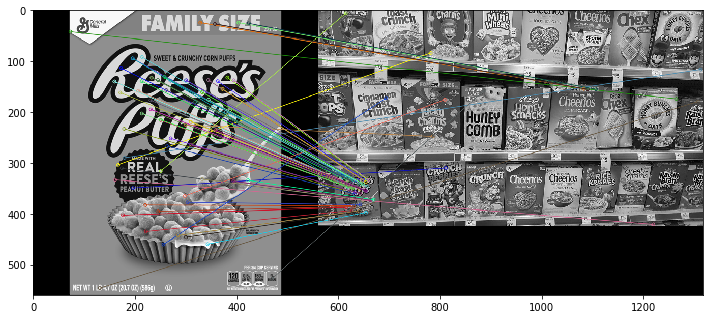

In [34]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

In [43]:
# Flann Based Matcher
sift = cv2.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [44]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [45]:
matches = flann.knnMatch(des1,des2,k=2)

In [46]:
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

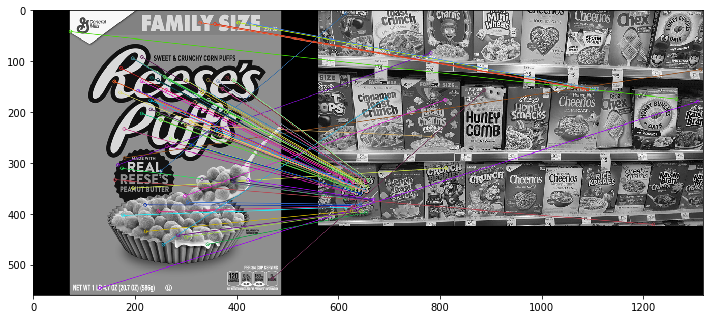

In [48]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(flann_matches)

In [49]:
# Flann but this time we show dots and single colors matching line

In [50]:
sift = cv2.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [51]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [52]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [53]:
matches = flann.knnMatch(des1,des2,k=2)
matchesMask = [[0,0] for i in range(len(matches))]

In [57]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [80]:
draw_params = dict(matchColor=(0,255,0),
                   singlePointColor=(255,0,0),
                   matchesMask = matchesMask,
                  flags = 0)

In [81]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

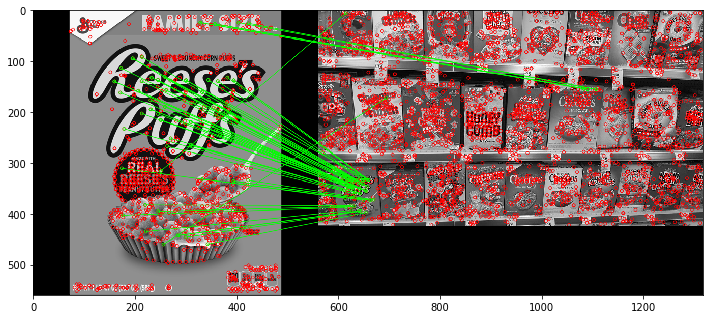

In [82]:
display(flann_matches)